# UBC Bolt 2025 Case Competition

## Introduction

We are given a case and we are trying our best to conduct data analytics

### Key Ask

Peak Mountain Resort operates year-round, offering a range of seasonal activities that attract visitors but also introduces significant safety risks and operational challenges.  With increasing injury rates, extended emergency response times, aging infrastructure, and financial constraints, the resort must find a way to improve guest safety without compromising its budget or long-term viability.

### Key Question

**How can Peak Mountain Resort implement cost-effective, data-driven safety measures and ensure financial sustainability?**

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset and Summary Statistics

In [2]:
expense_dat = pd.read_csv('data/expenses.csv')
expense_dat.head()

,Transaction_ID,Transaction_Type,Category,Amount,Date,Season,Weather,Customer_ID,Incident_ID
0,0,Revenue,Ticket Sale,3500,2025-02-25,Winter,Foggy,1415.0,NaN
1,1,Revenue,Ticket Sale,640,2025-02-25,Winter,Windy,5095.0,NaN
2,2,Expense,Ambulance Call,-1490,2025-02-25,Winter,Foggy,NaN,96.0
3,3,Expense,Equipment Maintenance,-730,2025-02-25,Winter,Sunny,NaN,NaN
4,4,Expense,Staff Salary,-4238,2025-02-25,Summer,Sunny,NaN,NaN


In [23]:
expense_dat.describe()

,Transaction_ID,Amount,Customer_ID,Incident_ID
count,2000.000000,2000.000000,820.000000,392.000000
mean,999.500000,-1386.926500,5484.306098,469.801020
std,577.494589,2929.388758,2613.724828,283.887277
min,0.000000,-8992.000000,1000.000000,2.000000
25%,499.750000,-2065.250000,3165.250000,191.000000
50%,999.500000,-564.000000,5502.500000,465.000000
75%,1499.250000,150.000000,7758.750000,685.000000
max,1999.000000,7700.000000,9992.000000,998.000000


In [3]:
incident_dat = pd.read_csv('data/incidents.csv')
incident_dat.head()

,Incident_ID,Customer_ID,Age,Gender,Season,Weather,Activity,Slope_Name,Slope_Difficulty,Skill_Level,Protective_Gear,Injuries,Injury_Severity,Response_Time,Hospital_Transport,Hospital_Stay_Length
0,0,2679,33,Male,Winter,Foggy,Skiing,Bunny Hill,Easy,Beginner,Helmet,Sprain,6,15,No,0
1,1,4257,36,Female,Summer,Sunny,Hiking,Devil’s Drop,Expert,Beginner,Helmet,Fracture,6,23,No,0
2,2,7924,47,Female,Winter,Foggy,Snowboarding,Thunder Run,Advanced,Beginner,Helmet,Sprain,8,13,Yes,1
3,3,7224,56,Male,Summer,Sunny,Hiking,Thunder Run,Advanced,Intermediate,Helmet,Fracture,5,9,No,0
4,4,9785,17,Male,Summer,Windy,Climbing,Blue Ridge,Intermediate,Beginner,None,Head Injury,8,10,Yes,4


In [24]:
incident_dat.describe()

,Incident_ID,Customer_ID,Age,Injury_Severity,Response_Time,Hospital_Stay_Length
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,5627.834000,37.122000,5.631000,14.238000,0.357000
std,288.819436,2589.633228,12.906343,1.950036,3.754924,0.991228
min,0.000000,1022.000000,15.000000,2.000000,6.000000,0.000000
25%,249.750000,3368.500000,26.000000,4.000000,11.000000,0.000000
50%,499.500000,5753.000000,38.000000,6.000000,14.000000,0.000000
75%,749.250000,7835.250000,49.000000,7.000000,17.000000,0.000000
max,999.000000,9991.000000,59.000000,10.000000,28.000000,4.000000


In [4]:
reviews_dat = pd.read_fwf("data/reviews.txt", header=None, names=["Review"], encoding="utf-8")
print(reviews_dat.head())

                                              Review
0  1. "Absolutely breathtaking views and fantasti...
1  2. "The lodge was cozy, and the staff was incr...
2  3. "Mountain biking trails were well-maintaine...
3  4. "Loved the guided nature walk. Learned so m...
4  5. "The zip-lining course was thrilling, and t...


## EDA

In [55]:
#find total revenues/expenses
revenue = expense_dat[expense_dat["Transaction_Type"] == "Revenue"]["Amount"].sum()
expenses = expense_dat[expense_dat["Transaction_Type"] == "Expense"]["Amount"].sum()

profit = revenue + expenses

print(f"Total Revenue: {revenue}, Total Expenses: {expenses}, Net Profit: {profit}")

Total Revenue: 645000, Total Expenses: -3418853, Net Profit: -2773853


In [57]:
#find how much is spent on each expense
category_expenses = expense_dat[expense_dat["Transaction_Type"] == "Expense"].groupby("Category")["Amount"].sum()
print(category_expenses)

Category
Ambulance Call           -675590
Equipment Maintenance    -240142
Staff Salary            -2503121
Name: Amount, dtype: int64


In [59]:
#Find the revenue of incidents per season/weather
season_trends = expense_dat.groupby("Season")["Amount"].sum()
weather_trends = expense_dat.groupby("Weather")["Amount"].sum()
print(season_trends)
print(weather_trends)

Season
Summer   -1595223
Winter   -1178630
Name: Amount, dtype: int64
Weather
Foggy   -399355
Rainy   -518924
Snowy   -334688
Sunny   -852655
Windy   -668231
Name: Amount, dtype: int64


In [58]:
#Find out when accidents are likely to occur during each season, weather
incident_analysis = expense_dat.groupby(["Season", "Weather"])["Incident_ID"].count()
print(incident_analysis)

Season  Weather
Summer  Rainy      57
        Sunny      69
        Windy      69
Winter  Foggy      57
        Snowy      56
        Sunny      48
        Windy      36
Name: Incident_ID, dtype: int64


In [61]:
#Analyze spending behaviour
customer_spending = expense_dat.groupby("Customer_ID")["Amount"].sum()
top_customers = customer_spending.nlargest(25)

print(top_customers)

Customer_ID
2390.0    7700
2483.0    7700
7060.0    7700
8252.0    7700
8409.0    7700
8439.0    7700
9133.0    7700
9459.0    7700
9528.0    7700
9739.0    7700
1404.0    7000
1854.0    7000
2512.0    7000
4115.0    7000
6267.0    7000
6396.0    7000
6523.0    7000
7716.0    7000
7911.0    7000
8596.0    7000
9057.0    6620
1722.0    6300
2684.0    6300
3509.0    6300
3843.0    6300
Name: Amount, dtype: int64


In [38]:
expense_dat.groupby(['Category'], as_index=False)['Amount'].mean()

,Category,Amount
0,Ambulance Call,-1723.443878
1,Equipment Maintenance,-597.368159
2,Rental,122.165450
3,Staff Salary,-6484.769430
4,Ticket Sale,1454.254279


In [63]:
expense_dat.groupby(['Category'], as_index=False)['Amount'].sum()

,Category,Amount
0,Ambulance Call,-675590
1,Equipment Maintenance,-240142
2,Rental,50210
3,Staff Salary,-2503121
4,Ticket Sale,594790


In [39]:
expense_dat.groupby(['Season'], as_index=False)['Amount'].mean()

,Season,Amount
0,Summer,-1608.087702
1,Winter,-1169.275794


In [42]:
expense_dat.groupby(['Weather'], as_index=False)['Amount'].mean()

,Weather,Amount
0,Foggy,-1518.460076
1,Rainy,-1491.160920
2,Snowy,-1208.259928
3,Sunny,-1547.468240
4,Windy,-1191.142602


In [65]:
expense_dat.groupby(['Season'], as_index=False)['Amount'].sum()

,Season,Amount
0,Summer,-1595223
1,Winter,-1178630


In [70]:
expense_dat.groupby(['Customer_ID'], as_index=False)['Amount'].sum()

,Customer_ID,Amount
0,1000.0,880
1,1035.0,160
2,1036.0,90
3,1043.0,100
4,1065.0,880
...,...,...
785,9963.0,135
786,9966.0,60
787,9978.0,2100
788,9980.0,150


## Data Visualization

<Axes: xlabel='Slope_Difficulty', ylabel='Injury_Severity'>

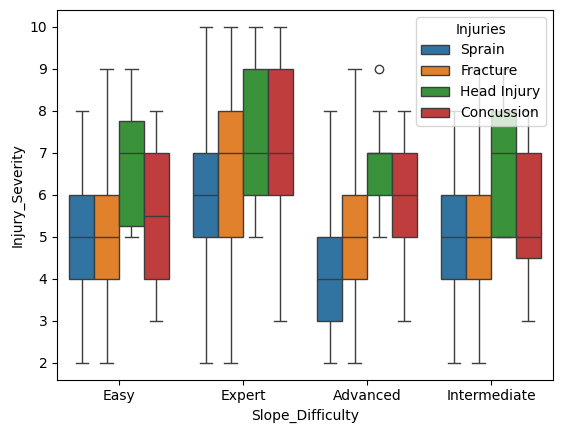

In [34]:
sns.boxplot(data=incident_dat, x="Slope_Difficulty", y="Injury_Severity", hue="Injuries")

## NLP Preprocessing

We need to first preprocess our text reviews data, this will include lowercasing everything, removing punctuation, tokenization, and lemmatization

In [5]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

In [6]:
# Download nlp libraries

#nltk.download("punkt")
#nltk.download("stopwords")
#nltk.download("wordnet")

In [7]:
# Initialize NLP tools
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

In [8]:
# Function to preprocess text
def preprocess_text(text):
    text = text.lower() 
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

reviews_dat["Cleaned_Review"] = reviews_dat["Review"].apply(preprocess_text)
reviews_dat.head()

,Review,Cleaned_Review
0,"1. ""Absolutely breathtaking views and fantasti...",1 absolutely breathtaking view fantastic skiin...
1,"2. ""The lodge was cozy, and the staff was incr...",2 lodge cozy staff incredibly friendly highly ...
2,"3. ""Mountain biking trails were well-maintaine...",3 mountain biking trail wellmaintained rental ...
3,"4. ""Loved the guided nature walk. Learned so m...",4 loved guided nature walk learned much local ...
4,"5. ""The zip-lining course was thrilling, and t...",5 ziplining course thrilling instructor profes...


We can then use a wordcloud to visualize common words

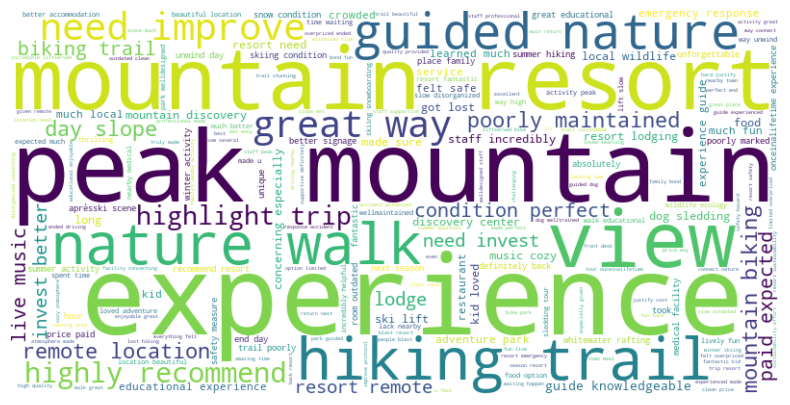

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(reviews_dat["Cleaned_Review"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

From the word cloud, we see there are a lot of frequent words involving the resort in the reviews, lets run a counter to double check

In [10]:
from collections import Counter

words = " ".join(reviews_dat["Cleaned_Review"]).split()
word_freq = Counter(words).most_common(10)

print(word_freq)

[('’', 293), ('resort', 223), ('trail', 120), ('great', 103), ('mountain', 99), ('experience', 95), ('staff', 77), ('need', 77), ('activity', 72), ('made', 66)]


In [11]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Polarity score

# Apply sentiment analysis
reviews_dat["Sentiment_Polarity"] = reviews_dat["Cleaned_Review"].apply(get_sentiment)

print(reviews_dat.head())

                                              Review  \
0  1. "Absolutely breathtaking views and fantasti...   
1  2. "The lodge was cozy, and the staff was incr...   
2  3. "Mountain biking trails were well-maintaine...   
3  4. "Loved the guided nature walk. Learned so m...   
4  5. "The zip-lining course was thrilling, and t...   

                                      Cleaned_Review  Sentiment_Polarity  
0  1 absolutely breathtaking view fantastic skiin...             0.35000  
1  2 lodge cozy staff incredibly friendly highly ...             0.14625  
2  3 mountain biking trail wellmaintained rental ...             0.00000  
3  4 loved guided nature walk learned much local ...             0.35000  
4  5 ziplining course thrilling instructor profes...             0.17500  


In [12]:
#Classify Sentiment based on polarity score
def classify_sentiment(polarity):
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply classification
reviews_dat["Sentiment"] = reviews_dat["Sentiment_Polarity"].apply(classify_sentiment)

print(reviews_dat.head())

                                              Review  \
0  1. "Absolutely breathtaking views and fantasti...   
1  2. "The lodge was cozy, and the staff was incr...   
2  3. "Mountain biking trails were well-maintaine...   
3  4. "Loved the guided nature walk. Learned so m...   
4  5. "The zip-lining course was thrilling, and t...   

                                      Cleaned_Review  Sentiment_Polarity  \
0  1 absolutely breathtaking view fantastic skiin...             0.35000   
1  2 lodge cozy staff incredibly friendly highly ...             0.14625   
2  3 mountain biking trail wellmaintained rental ...             0.00000   
3  4 loved guided nature walk learned much local ...             0.35000   
4  5 ziplining course thrilling instructor profes...             0.17500   

  Sentiment  
0  Positive  
1  Positive  
2   Neutral  
3  Positive  
4  Positive  


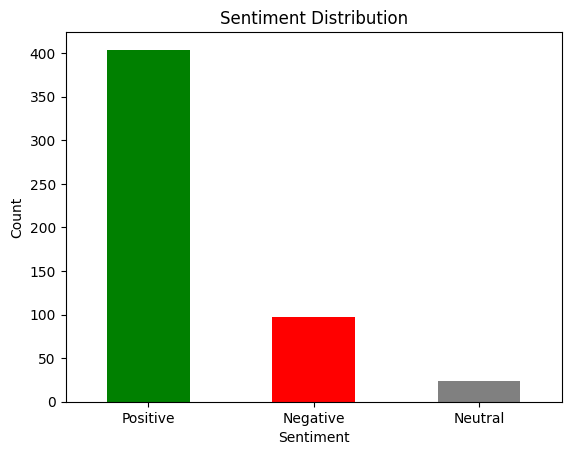

In [13]:
# Plot sentiment distribution
sentiment_counts = reviews_dat["Sentiment"].value_counts()
sentiment_counts.plot(kind="bar", color=["green", "red", "gray"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [14]:
reviews_dat.head()

,Review,Cleaned_Review,Sentiment_Polarity,Sentiment
0,"1. ""Absolutely breathtaking views and fantasti...",1 absolutely breathtaking view fantastic skiin...,0.35000,Positive
1,"2. ""The lodge was cozy, and the staff was incr...",2 lodge cozy staff incredibly friendly highly ...,0.14625,Positive
2,"3. ""Mountain biking trails were well-maintaine...",3 mountain biking trail wellmaintained rental ...,0.00000,Neutral
3,"4. ""Loved the guided nature walk. Learned so m...",4 loved guided nature walk learned much local ...,0.35000,Positive
4,"5. ""The zip-lining course was thrilling, and t...",5 ziplining course thrilling instructor profes...,0.17500,Positive


In [18]:
negative_reviews = reviews_dat[reviews_dat['Sentiment'] == "Negative"]
negative_reviews.head()

,Review,Cleaned_Review,Sentiment_Polarity,Sentiment
9,"10. ""The spa was a much-needed relaxation spot...",10 spa muchneeded relaxation spot long day skiing,-0.050000,Negative
12,"13. ""Rooms were a bit outdated, but the views ...",13 room bit outdated view made,-0.400000,Negative
16,"17. ""The ice skating rink was crowded, and the...",17 ice skating rink crowded rental skate poor ...,-0.400000,Negative
22,"23. ""Ski lifts were old and slow. Desperately ...",23 ski lift old slow desperately need upgrade,-0.266667,Negative
29,"30. ""Our room was not ready when we arrived, a...",30 room ready arrived checkin staff rude,-0.050000,Negative


## Negative Reviews Cloud

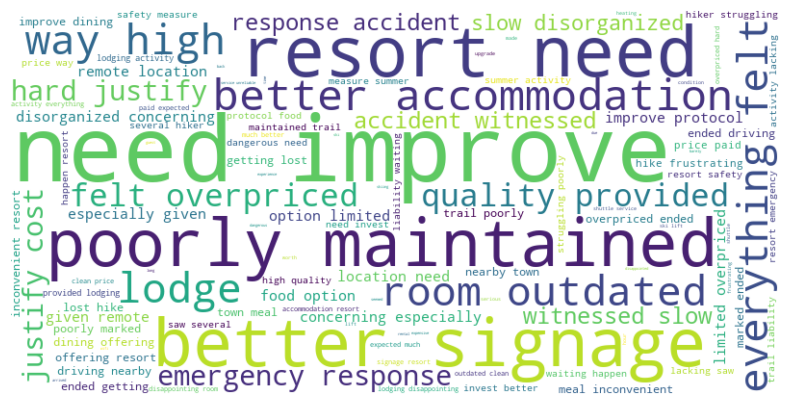

In [19]:
text = " ".join(negative_reviews["Cleaned_Review"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [22]:
words = " ".join(negative_reviews["Cleaned_Review"]).split()
word_freq = Counter(words).most_common(30)

print(word_freq)

[('’', 80), ('resort', 63), ('need', 37), ('price', 25), ('trail', 24), ('improve', 23), ('overpriced', 22), ('ended', 22), ('poorly', 21), ('better', 21), ('lodging', 20), ('activity', 18), ('room', 17), ('outdated', 16), ('slow', 15), ('food', 15), ('frustrating', 14), ('signage', 13), ('get', 13), ('way', 13), ('safety', 13), ('felt', 12), ('could', 12), ('option', 12), ('accommodation', 12), ('dining', 11), ('remote', 11), ('maintained', 11), ('emergency', 11), ('disappointing', 11)]


Trails, price, lodging, food, accomodation, safety, location seems to be specific issues in our resort.

Hypothesis test for decesion threshold, when to change or reconstruct.